In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
sns.set()

In [8]:
bank_stocks = pd.read_pickle('all_banks')

In [3]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [7]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [8]:
#Fetch max closing price for each bank - approach 1 - using for loop to get into multiple index
bank_stocks['BAC']['Close'].max()

54.9

In [9]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [13]:
#Alternate aapproach - using cross section method...vvv imp
#how to use
bank_stocks.xs(key='C',axis=1,level='Bank Ticker').head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,490.0,493.8,481.1,492.9,1537660
2006-01-04,488.6,491.0,483.5,483.8,1871020
2006-01-05,484.4,487.8,484.0,486.2,1143160
2006-01-06,488.8,489.0,482.0,486.2,1370250
2006-01-09,486.0,487.4,483.0,483.9,1680740


In [16]:
#Fetch max closing price for each bank - approach 2 - using cross section to get into multiple index
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [17]:
# Find % change in closing price

In [18]:
returns = pd.DataFrame()

In [19]:
for tick in tickers:
    
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [22]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


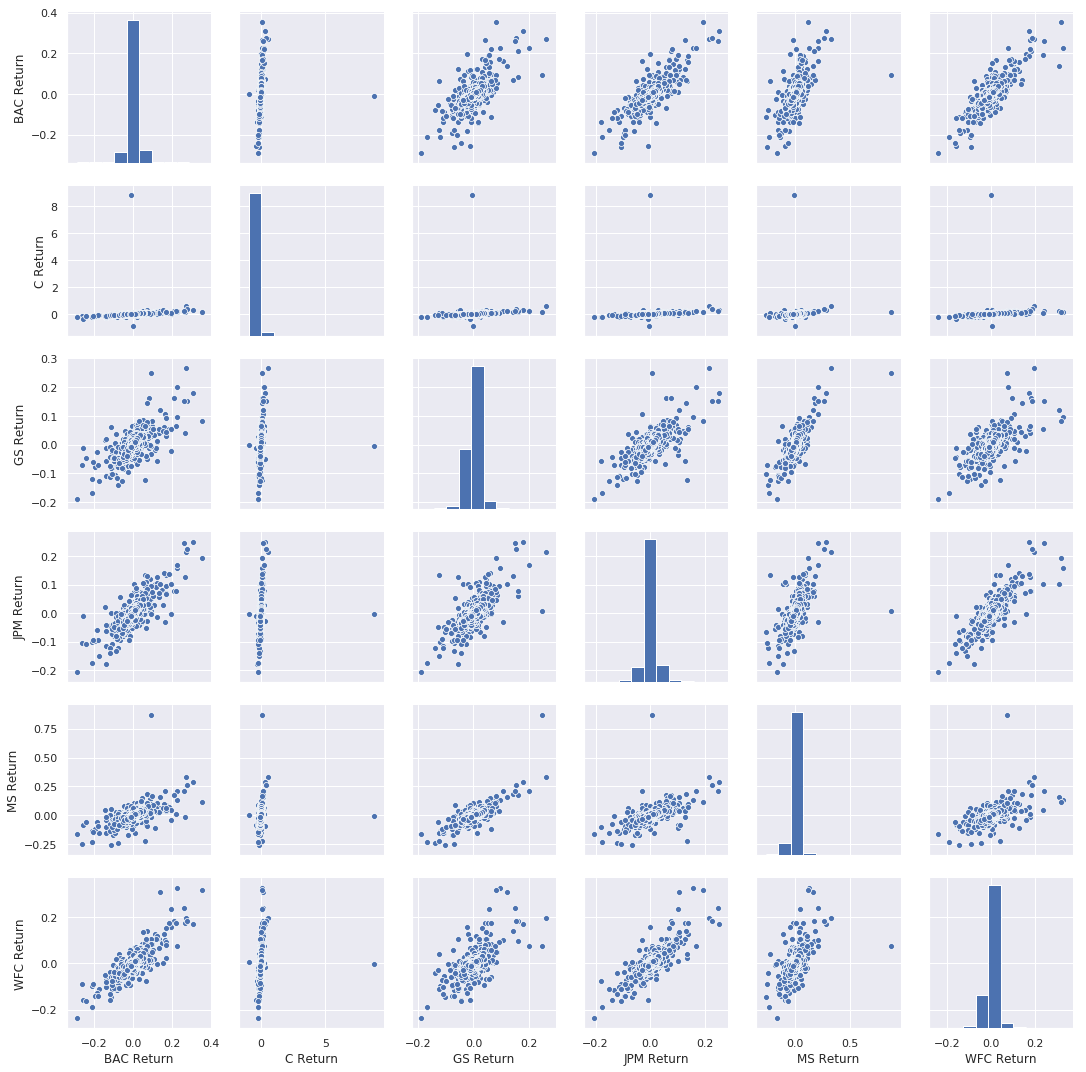

In [24]:
sns.pairplot(returns[1:])
#Citibank has wiered data--do further analysis to draw some insights

In [26]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [30]:
returns.describe()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,0.000258,0.002977,0.000451,0.000575,0.000423,0.000656
std,0.036650,0.179969,0.025346,0.027656,0.037820,0.030233
min,-0.289694,-0.899107,-0.189596,-0.207274,-0.258929,-0.238223
25%,-0.011303,-0.011193,-0.010185,-0.009934,-0.012397,-0.008664
50%,0.000000,-0.000211,0.000368,0.000168,0.000254,0.000000
75%,0.010751,0.010751,0.011004,0.010022,0.012504,0.008844
max,0.352691,8.769912,0.264678,0.250967,0.869835,0.327645


In [32]:
#Find out what happened with Citibank ('C') on 6-May-2011 - on google
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [33]:
#Find out what happened with Citibank ('C') on 6-May-2011
# Reason - they anounced reverse stock split - this could be 1 reason for wierd data of CITI bank[see pair plot] 
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [35]:
#find std deviation
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [36]:
# Citibank has the maximum deviation

#The U.S. rescued Citigroup Inc, agreeing to shoulder most losses on about ... 
#bolstering investor hopes that the government will support big banks as ... 
#the government would, “if need be,” make similar decisions in the future.

In [37]:
returns['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [38]:
# We have dataset till 2015 - so check which stock has minimum deviation currently...
#so people can choose it for investment

#Wells Forgo Corporation(WFC) is having less deviation

In [39]:
#Morgan And Stanley(MS) has highest deviation...now check further for MS...plot distribution plot

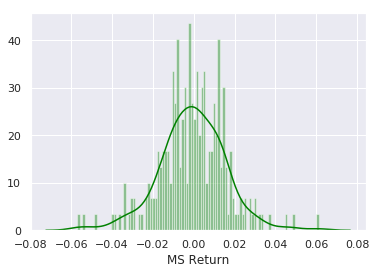

In [40]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

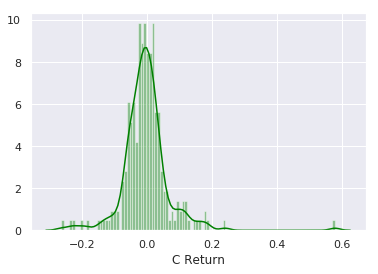

In [42]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='green',bins=100)

In [43]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

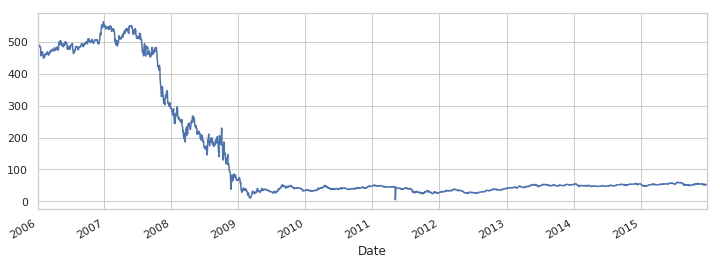

In [46]:
#plot a line graph for closing price of Citi Bank

sns.set_style('whitegrid')
bank_stocks['C']['Close'].plot(figsize=(12,4))


In [47]:
# From graph - 
# 1) see May 2011 - downward deviation bcz of reverse stock split happened-check google news
# 2) In 2007 - many banks had financial crisis 

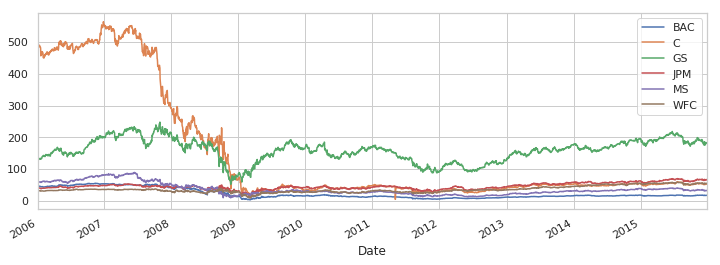

In [50]:
#Plot line graphs - using for loop

for tick in tickers:
    
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
    plt.legend()

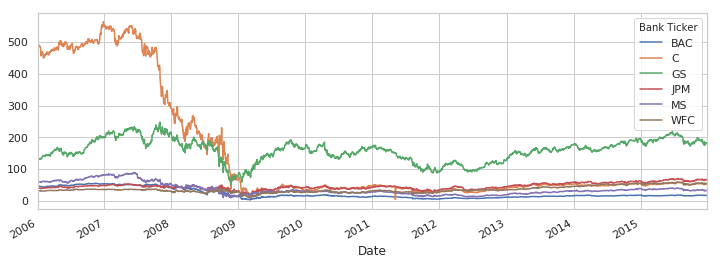

In [52]:
#Plot line graph using cross section

bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4),label=tick)

In [9]:
#Plot line graph using 3) cufflinks

import cufflinks as cf
cf.go_offline()

In [10]:
cf.__version__

'0.15'

In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot(kind='line')

In [ ]:
##########################
# Assignment Ends here unless you have more questions and insights to draw from features given
#######################################################################################

In [13]:
#how to use datareader - will read datasets from url-can support many enterprise repo's

from pandas_datareader import data
import datetime

In [16]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
BAC = data.DataReader('BAC','yahoo',start,end)

In [17]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,36.147552
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.763645
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.809727
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.755962
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.779007


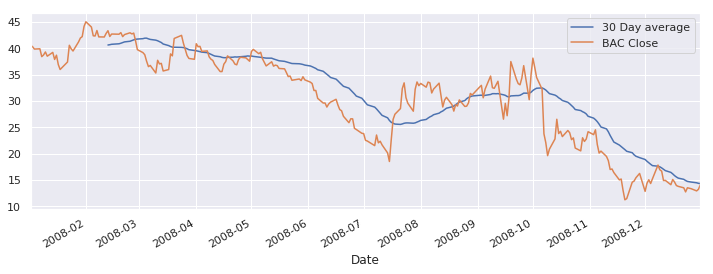

In [18]:
#Concept Rolling average - in graph - blue line shows average for the period of 30 days

plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()
